In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

sign-language-digits-dataset



* In this data there are 2062 sign language digits images.
* As you know digits are from 0 to 9. Therefore there are 10 unique sign.
* At the beginning of tutorial we will use only sign 0 and 1 for simplicity.
* In data, sign zero is between indexes 204 and 408. Number of zero sign is 205.
* Also sign one is between indexes 822 and 1027. Number of one sign is 206. Therefore, we will use 205 samples from each classes(labels).
* Note: Actually 205 sample is very very very little for deep learning. But this is tutorial so it does not matter so much.
* Lets prepare our X and Y arrays. X is image array (zero and one signs) and Y is label array (0 and 1).

(-0.5, 63.5, 63.5, -0.5)

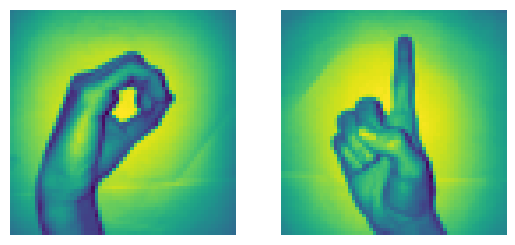

In [104]:
x_l = np.load("/kaggle/input/sign-language-digits-dataset/X.npy")
y_l = np.load("/kaggle/input/sign-language-digits-dataset/Y.npy")

img_size = 64
plt.subplot(1, 2, 1)  # 1st element of 2dim plot
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)  # 2nd element of 2dim plot
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')  # removing axis to see photo unframed


In [105]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 

z = np.zeros(205)
o = np.ones(205)

Y = np.concatenate((z, o), axis=0).reshape(X.shape[0], 1)

print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


* The shape of the X is (410, 64, 64)
    *     410 means that we have 410 images (zero and one signs)
    *     64 means that our image size is 64x64 (64x64 pixels)
* The shape of the Y is (410,1)
    *     410 means that we have 410 labels (0 and 1)

### split X and Y into train and test sets.

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

* Now we have 3 dimensional input array (X) so we need to make it flatten (2D) in order to use as input for our first deep learning model.
* Our label array (Y) is already flatten(2D) so we leave it like that.
* Lets flatten X array(images array).
    * Flattening: transforming data into plain text files stored in file systems rather than in databases

In [107]:
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])

print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


* As you can see, we have 348 images and each image has 4096 pixels in image train array.
* Also, we have 62 images and each image has 4096 pixels in image test array.
* Then lets transpose. 

In [108]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


What we did up to this point:

* Choose our labels (classes) that are sign zero and sign one
* Create and flatten train and test sets
* Our final inputs(images) and outputs(labels or classes) looks like this:
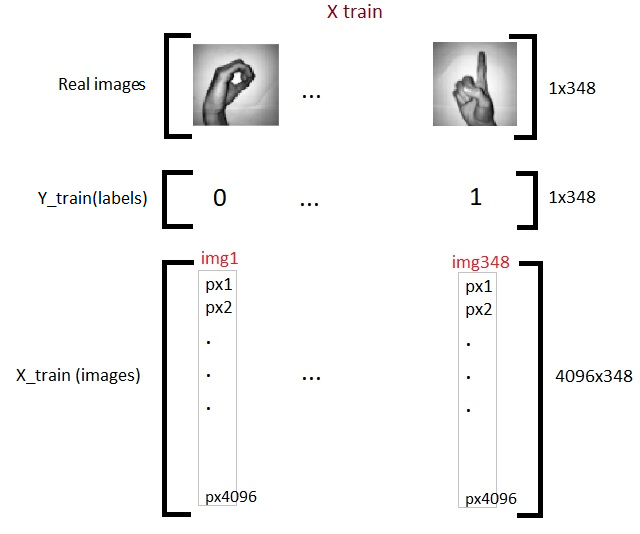

# Logistic Regression

## Initializing parameters

In [109]:
def initialize_weights_and_bias(dim):
    w = np.full((dim, 1), 0.01)  # all weights assigned to 0.01
    b = 0.0  # bias is 0.0 at the beginning
    return w, b

## Forward Propagation

In [110]:
# calculating z
# z = np.dot(w.T, x_train) + b 
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [111]:
y_head = sigmoid(0)
y_head

0.5

In [112]:
def forward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    return cost

## Optimization Algorithm with Gradient Descent

In [113]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    # backward propagation
    derivative_weight = (np.dot(x_train, ((y_head-y_train).T))) / x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train) / x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost, gradients

In [114]:
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iteration times
    for i in range(number_of_iteration):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        # update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i, cost))
        # we update(learn) parameters weights and bias
        parameters = {"weight": w, "bias": b}
        plt.plot(index, cost_list2)
        plt.xticks(index, rotation='vertical')
        plt.xlabel("Number of Iteration")
        plt.ylabel("Cost")
        plt.show()
        return parameters, gradients, cost_list

## Prediction

In [115]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
        
    return Y_prediction

## Combining them under Logistic Regression

In [116]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    y_pred_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_pred_train = predict(parameters["weight"], parameters["bias"], x_train)
    
     # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))
    


Cost after iteration 0: 14.014222


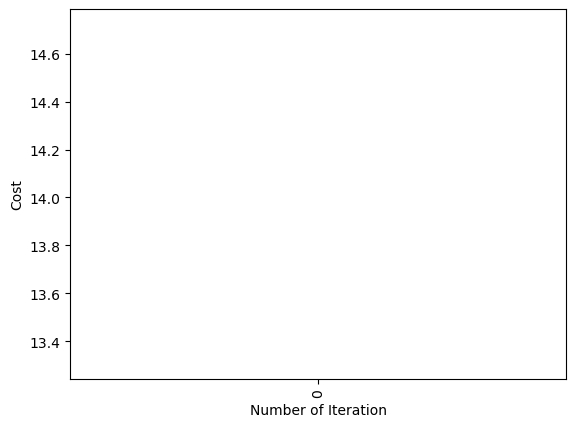

train accuracy: 50.57471264367816 %
test accuracy: 46.7741935483871 %


In [117]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

# LogReg with sklearn

In [118]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))


test accuracy: 0.967741935483871 
train accuracy: 1.0 


# Summary

* Initialize parameters weight and bias
* Forward propagation
* Loss function
* Cost function
* Backward propagation (gradient descent)
* Prediction with learnt parameters weight and bias
* Logistic regression with sklearn